## 4.1 Landau level wave functions and probability density (square of the ewave function)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

1. Write a ....

In [144]:
# hbar = 6.582e-16
hbar = 1.054_571_817e-34
e = 1.6e-19

B = 10  # Arbitrary value
# B = hbar / e  # Arbitrary value

m = 9.1e-31
wc = e * B / m

beta = m * wc / hbar  # TODO: From where do we take these values?


def exponential(zeta: float) -> float:
    return np.exp(-(zeta ** 2) / (2 * beta))  # TODO: Does the minus sign goes here?


def wave_function0(zeta: float) -> float:
    return np.power(beta / math.pi, 0.25) * exponential(zeta) 


def wave_function1(zeta: float) -> float:
    return np.power(1 / (4 * math.pi * beta), 0.25) * exponential(zeta) * zeta


def zeta(x):
    return beta * x


x_ = np.arange(-200, 200, 1)
zeta_ = zeta(x_)

wave_array = np.zeros((100, len(x_)))

wave_array[0] = wave_function0(zeta_)
wave_array[1] = wave_function1(zeta_)

for n in range(2, 100):
    wave_array[n] = math.sqrt(2 / n) * (zeta_ * wave_array[n-1] - math.sqrt((n - 1) / 2) * wave_array[n-2])


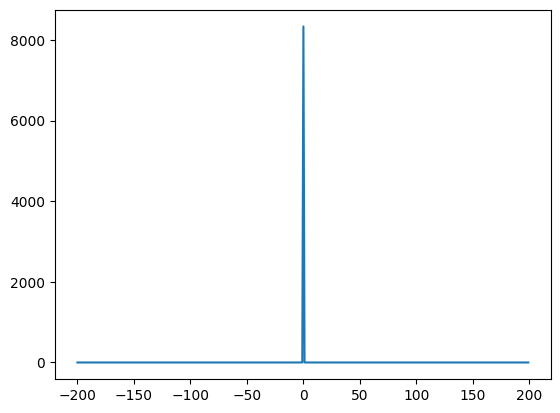

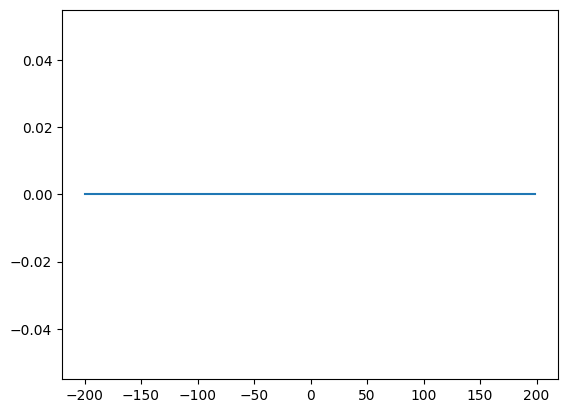

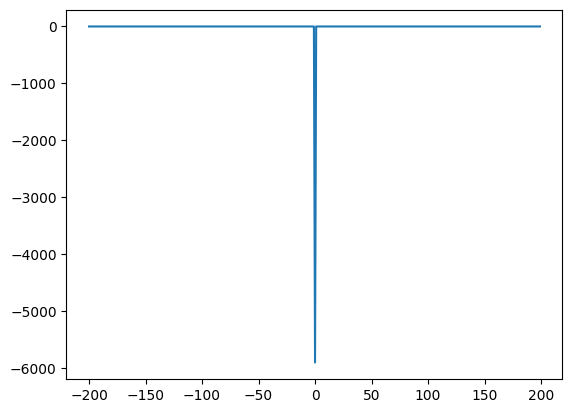

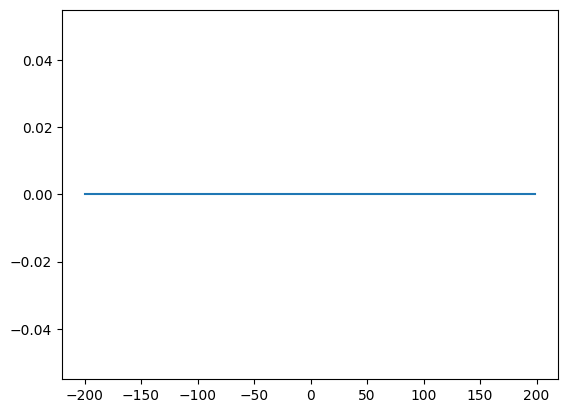

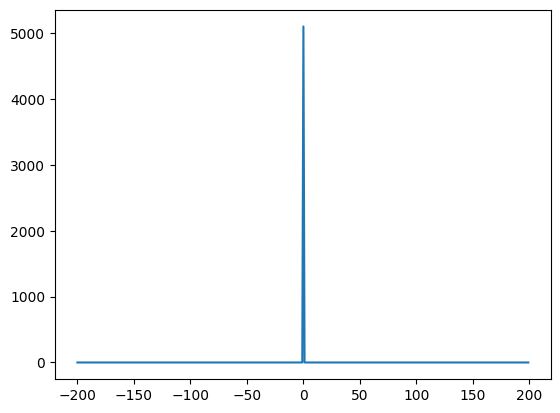

In [145]:
for idx in range(5):
    plt.plot(x_, wave_array[idx])
    plt.show()

In [128]:
# hbar = 6.582e-16
hbar = 1.054_571_817e-34
m = 9.1e-31
e = 1.6e-19

B = 1  # Arbitrary value
# B = hbar / e  # Arbitrary value

wc = e * B / m


x_ = np.arange(-200, 200, 1)

wave0 = (m * wc / (np.pi * hbar)) ** 0.25 * np.exp(- m * wc / (2 * hbar) * x_**2)
wave1 = np.sqrt(1/2) * (m * wc / (np.pi * hbar)) ** 0.25 * np.exp(- m * wc / (2 * hbar) * x_**2) * np.sqrt(m * wc / (hbar)) * x_

600 lines/mm

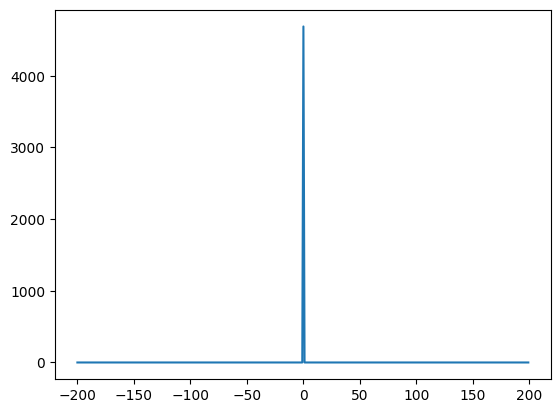

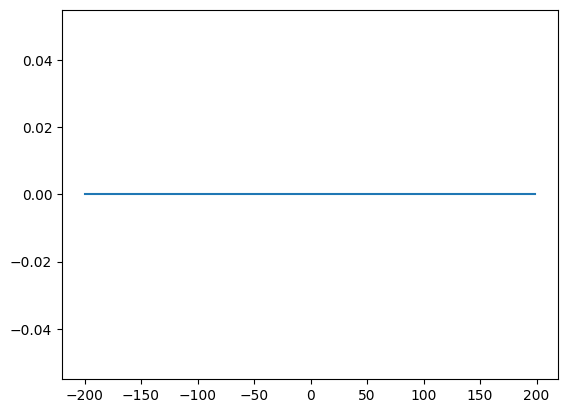

In [127]:
plt.plot(x_, wave0)
plt.show()
plt.plot(x_, wave1)
plt.show()

In [ ]:
# raya azul
# distancia entre grading y tubo d = 400mm pm 0.5mm
# 2l = 756-504 mm pm 0.5mm

# distancia entre grading y tubo d = 400mm pm 0.5mm
# 2l = 758-505 mm pm 0.5mm

# distancia entre grading y tubo d = 400mm pm 0.5mm
# 2l = 757-505 mm pm 0.5mm



In [ ]:
# raya verde
# distancia entre grading y tubo d = 400mm pm 0.5mm
# 2l = 791-473 mm pm 0.5mm

# distancia entre grading y tubo d = 400mm pm 0.5mm
# 2l = 793-474 mm pm 0.5mm

# distancia entre grading y tubo d = 400mm pm 0.5mm
# 2l = 792-473 mm pm 0.5mm


In [ ]:
# raya amarilla
# distancia entre grading y tubo d = 400mm pm 0.5mm
# 2l = 806-461 mm pm 0.5mm

# distancia entre grading y tubo d = 400mm pm 0.5mm
# 2l = 802-463 mm pm 0.5mm

# distancia entre grading y tubo d = 400mm pm 0.5mm
# 2l = 805-463 mm pm 0.5mm


Nuevo tubo

In [ ]:
# raya morada
# distancia entre grading y tubo d = 400mm pm 0.5mm
# 2l = 788-528 mm pm 0.5mm

# distancia entre grading y tubo d = 400mm pm 0.5mm
# 2l = 788-527 mm pm 0.5mm

# distancia entre grading y tubo d = 400mm pm 0.5mm
# 2l = 788-528 mm pm 0.5mm


In [ ]:
# raya azul
# distancia entre grading y tubo d = 400mm pm 0.5mm
# 2l = 795-520 mm pm 0.5mm

# distancia entre grading y tubo d = 400mm pm 0.5mm
# 2l = 796-519 mm pm 0.5mm

# distancia entre grading y tubo d = 400mm pm 0.5mm
# 2l = 794-521 mm pm 0.5mm


In [ ]:
# raya verde ocuro
# distancia entre grading y tubo d = 400mm pm 0.5mm
# 2l = 806-515 mm pm 0.5mm

# distancia entre grading y tubo d = 400mm pm 0.5mm
# 2l = 805-515 mm pm 0.5mm

# distancia entre grading y tubo d = 400mm pm 0.5mm
# 2l = 804-514 mm pm 0.5mm

In [ ]:
# raya verde claro
# distancia entre grading y tubo d = 400mm pm 0.5mm
# 2l = 808-511 mm pm 0.5mm

# distancia entre grading y tubo d = 400mm pm 0.5mm
# 2l = 803-510 mm pm 0.5mm

# distancia entre grading y tubo d = 400mm pm 0.5mm
# 2l = 807-511 mm pm 0.5mm

In [ ]:
# raya amarillo
# distancia entre grading y tubo d = 400mm pm 0.5mm
# 2l = 836-487 mm pm 0.5mm

# distancia entre grading y tubo d = 400mm pm 0.5mm
# 2l = 841-488 mm pm 0.5mm

# distancia entre grading y tubo d = 400mm pm 0.5mm
# 2l = 839-486 mm pm 0.5mm

In [ ]:
# raya roja
# distancia entre grading y tubo d = 400mm pm 0.5mm
# 2l = 867-463 mm pm 0.5mm

# distancia entre grading y tubo d = 400mm pm 0.5mm
# 2l = 864-460 mm pm 0.5mm

# distancia entre grading y tubo d = 400mm pm 0.5mm
# 2l = 865-461 mm pm 0.5mm